In [1]:
# 5.1
# 用sklearn构建决策树，使用C4.5算法

In [4]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [5]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's improv

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [7]:
# 首先传入训练集
features = ["年龄", "有工作", "有自己的房子", "信贷情况"]
X_train = pd.DataFrame([
    ["青年", "否", "否", "一般"],
    ["青年", "否", "否", "好"],
    ["青年", "是", "否", "好"],
    ["青年", "是", "是", "一般"],
    ["青年", "否", "否", "一般"],
    ["中年", "否", "否", "一般"],
    ["中年", "否", "否", "好"],
    ["中年", "是", "是", "好"],
    ["中年", "否", "是", "非常好"],
    ["中年", "否", "是", "非常好"],
    ["老年", "否", "是", "非常好"],
    ["老年", "否", "是", "好"],
    ["老年", "是", "否", "好"],
    ["老年", "是", "否", "非常好"],
    ["老年", "否", "否", "一般"]
])
y_train = pd.DataFrame(["否", "否", "是", "是", "否",
                        "否", "否", "是", "是", "是",
                        "是", "是", "是", "是", "否"])
class_names = [str(k) for k in np.unique(y_train)]

# 数据预处理
# 在这里要注意，我们这里构建的是一个分类树，意味着我们传入的特征是字符串类型的
# 为了处理方便，我们需要首先将特征进行预处理，也就是进行一个“标准化”
le_x = preprocessing.LabelEncoder()
le_x.fit(np.unique(X_train)) # 将每个特征与数字匹配
# 此处的apply其实和R语言里面的一模一样，不过可以指定按照行或者列来进行apply
X_train = X_train.apply(le_x.transform) # transform函数就是将字符串特征转化为数字，Transform labels to normalized encoding.

# 进行模型构建
# sklearn使用的算法默认是改进后的CART算法，其实和C4.5基本类似，只不过默认使用gini作为标准，在构建模型的时候也可以选entropy，这样就是C4.5
# criterion = "entropy"
model_tree = DecisionTreeClassifier()
# 训练模型
model_tree.fit(X_train, y_train)

# 导出决策树的可视化文件，文件格式是dot
dot_data = tree.export_graphviz(model_tree, out_file=None,
                                feature_names=features,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)
# 使用graphviz包，对决策树进行展示，没装
# graph = graphviz.Source(dot_data)
# graph

In [8]:
# 这个就是用sklearn自带的导出工具
tree_text = tree.export_text(model_tree, feature_names = features)
print(tree_text)

|--- 有自己的房子 <= 3.00
|   |--- 有工作 <= 3.00
|   |   |--- class: 否
|   |--- 有工作 >  3.00
|   |   |--- class: 是
|--- 有自己的房子 >  3.00
|   |--- class: 是



In [9]:
X_train
# 可以发现，标准化后的X_train其中特征就完全变成了数字
# 其实就可以当成回归器里面那种连续型变量来处理
# sklearn官方文档里面也说了，他们用的这种改进型CART算法不支持分类变量，可能是由于这个关系所以要这样处理数据（？

,0,1,2,3
0,6,2,2,0
1,6,2,2,3
2,6,4,2,3
3,6,4,4,0
4,6,2,2,0
5,1,2,2,0
6,1,2,2,3
7,1,4,4,3
8,1,2,4,7
9,1,2,4,7


In [10]:
# 5.2.1
# 用平方误差准则，生成一个二叉回归树
# 这里是直接用CART算法来进行生成的，并且没有进行剪枝

In [11]:
train_X = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]).T
y = np.array([4.50, 4.75, 4.91, 5.34, 5.80, 7.05, 7.90, 8.23, 8.70, 9.00])

In [12]:
# 没剪枝
Regressor_Tree = DecisionTreeRegressor()
Regressor_Tree.fit(train_X, y)

DecisionTreeRegressor()

In [13]:
print(tree.export_text(Regressor_Tree, feature_names = 'X'))

|--- X <= 5.50
|   |--- X <= 3.50
|   |   |--- X <= 1.50
|   |   |   |--- value: [4.50]
|   |   |--- X >  1.50
|   |   |   |--- X <= 2.50
|   |   |   |   |--- value: [4.75]
|   |   |   |--- X >  2.50
|   |   |   |   |--- value: [4.91]
|   |--- X >  3.50
|   |   |--- X <= 4.50
|   |   |   |--- value: [5.34]
|   |   |--- X >  4.50
|   |   |   |--- value: [5.80]
|--- X >  5.50
|   |--- X <= 7.50
|   |   |--- X <= 6.50
|   |   |   |--- value: [7.05]
|   |   |--- X >  6.50
|   |   |   |--- value: [7.90]
|   |--- X >  7.50
|   |   |--- X <= 8.50
|   |   |   |--- value: [8.23]
|   |   |--- X >  8.50
|   |   |   |--- X <= 9.50
|   |   |   |   |--- value: [8.70]
|   |   |   |--- X >  9.50
|   |   |   |   |--- value: [9.00]



|--- X <= 5.50
|   |--- X <= 3.50
|   |   |--- value: [4.72]
|   |--- X >  3.50
|   |   |--- value: [5.57]
|--- X >  5.50
|   |--- X <= 7.50
|   |   |--- X <= 6.50
|   |   |   |--- value: [7.05]
|   |   |--- X >  6.50
|   |   |   |--- value: [7.90]
|   |--- X >  7.50
|   |   |--- X <= 8.50
|   |   |   |--- value: [8.23]
|   |   |--- X >  8.50
|   |   |   |--- value: [8.85]



Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

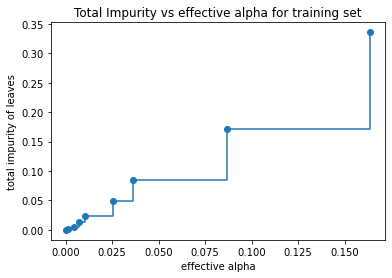

In [14]:
# 剪枝
# 其实按照这个alpha参数设置，基本上和预剪枝的那种没啥区别，就是切分点不一样，但是最终的叶子结点是一样的
Regressor_Tree = DecisionTreeRegressor(ccp_alpha = 0.02)
Regressor_Tree.fit(train_X, y)
print(tree.export_text(Regressor_Tree, feature_names = 'X'))

# 剪枝过程中，sklearn提供了cost_complexity_pruning_path来让你看到每一步剪枝生成的alpha以及最佳子树
pruning_path = Regressor_Tree.cost_complexity_pruning_path(train_X, y)
# 其实就像fit拟合一样，用训练数据集放进去剪枝，然后就能得到子树序列的alpha以及对应的欠拟合情况
alpha, impurities = pruning_path.ccp_alphas, pruning_path.impurities
alpha

# 画图展示
fig, ax = plt.subplots()
ax.plot(alpha[:-1], impurities[:-1], marker = "o", drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
# 随着alpha增大，欠拟合度也在不断增大
# 当然如果这里有测试集，就可以结合测试集的数据，来看不同alpha下的测试集/训练集准确率，从而选择合适的alpha